In [1]:
import pandas as pd
patients1 = pd.read_csv('C:\\Users\\Mahi2\\capstone\\capstone_healthpredictors\\data\\patients.csv')
conditions1 = pd.read_csv('C:\\Users\\Mahi2\\capstone\\capstone_healthpredictors\\data\\condis.csv')
immunizations = pd.read_csv('C:\\Users\\Mahi2\\capstone\\capstone_healthpredictors\\data\\immunizations.csv')
# View a few rows (table)
print(patients1.head().to_string())

                                     Id   BIRTHDATE DEATHDATE          SSN    DRIVERS    PASSPORT PREFIX        FIRST        LAST SUFFIX MAIDEN MARITAL   RACE    ETHNICITY GENDER                      BIRTHPLACE                         ADDRESS         CITY          STATE           COUNTY     ZIP        LAT        LON  HEALTHCARE_EXPENSES  HEALTHCARE_COVERAGE
0  f0f3bc8d-ef38-49ce-a2bd-dfdda982b271  2017-08-24       NaN  999-68-6630        NaN         NaN    NaN   Jacinto644     Kris249    NaN    NaN     NaN  white  nonhispanic      M      Beverly  Massachusetts  US       888 Hickle Ferry Suite 38  Springfield  Massachusetts   Hampden County  1106.0  42.151961 -72.598959              8446.49              1499.08
1  067318a4-db8f-447f-8b6e-f2f61e9baaa5  2016-08-01       NaN  999-15-5895        NaN         NaN    NaN      Alva958  Krajcik437    NaN    NaN     NaN  white  nonhispanic      F       Boston  Massachusetts  US             1048 Skiles Trailer      Walpole  Massachusetts   Norfolk

In [2]:
print("\nShape (rows, columns):", patients1.shape)
print(patients1.columns.tolist())
patients1['memberid'] = patients1['Id'].str[:8]
cols_to_drop = ['SSN', 'DRIVERS','PASSPORT',  'PREFIX', 'SUFFIX','MAIDEN']
patients1.drop(columns=cols_to_drop, inplace=True)


Shape (rows, columns): (12352, 25)
['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX', 'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTY', 'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE']


In [3]:
missing_counts = patients1.isnull().sum()
#print(missing_counts)
missing_percent = patients1.isnull().mean() * 100
#print(missing_percent)

missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent
})
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]
print(missing_summary)

           Missing Count  Missing %
DEATHDATE          10000  80.958549
MARITAL             3519  28.489313
ZIP                 5652  45.757772


In [4]:
patients2 = patients1.copy()

# Convert DEATHDATE to datetime
patients2['DEATHDATE'] = pd.to_datetime(patients2['DEATHDATE'], errors='coerce')
# Create binary alive/deceased column
patients2['is_alive'] = patients2['DEATHDATE'].isna().astype(int)
# MARITAL: fill missing with 'Unknown'
patients2['MARITAL'] = patients2['MARITAL'].fillna('Unknown')
# Convert BIRTHDATE to datetime
patients2['BIRTHDATE'] = pd.to_datetime(patients2['BIRTHDATE'], errors='coerce')

# Calculate age (use today if alive)
patients2['AGE'] = (
    (patients2['DEATHDATE'].fillna(pd.Timestamp.today()) - patients2['BIRTHDATE'])
    .dt.days / 365.25
).astype(int)

bins = [0, 18, 35, 50, 65, 120]
labels = ['0–17', '18–34', '35–49', '50–64', '65+']

patients2['AGE_GROUP'] = pd.cut(patients2['AGE'], bins=bins, labels=labels, right=False)

print(patients2.head().to_string())

                                     Id  BIRTHDATE DEATHDATE        FIRST        LAST  MARITAL   RACE    ETHNICITY GENDER                      BIRTHPLACE                         ADDRESS         CITY          STATE           COUNTY     ZIP        LAT        LON  HEALTHCARE_EXPENSES  HEALTHCARE_COVERAGE  memberid  is_alive  AGE AGE_GROUP
0  f0f3bc8d-ef38-49ce-a2bd-dfdda982b271 2017-08-24       NaT   Jacinto644     Kris249  Unknown  white  nonhispanic      M      Beverly  Massachusetts  US       888 Hickle Ferry Suite 38  Springfield  Massachusetts   Hampden County  1106.0  42.151961 -72.598959              8446.49              1499.08  f0f3bc8d         1    8      0–17
1  067318a4-db8f-447f-8b6e-f2f61e9baaa5 2016-08-01       NaT      Alva958  Krajcik437  Unknown  white  nonhispanic      F       Boston  Massachusetts  US             1048 Skiles Trailer      Walpole  Massachusetts   Norfolk County  2081.0  42.177370 -71.281353             89893.40              1845.72  067318a4         1  

In [5]:
# Check missing % AFTER cleaning (correct dataset!)
missing_percent2 = patients2.isnull().mean() * 100
print(missing_percent2)

# Also show missing summary table
missing_counts2 = patients2.isnull().sum()
missing_summary2 = pd.DataFrame({
    'Missing Count': missing_counts2,
    'Missing %': missing_percent2
})
missing_summary2 = missing_summary2[missing_summary2['Missing Count'] > 0]

print("\nMissing fields after cleaning:")
print(missing_summary2)

Id                      0.000000
BIRTHDATE               0.000000
DEATHDATE              80.958549
FIRST                   0.000000
LAST                    0.000000
MARITAL                 0.000000
RACE                    0.000000
ETHNICITY               0.000000
GENDER                  0.000000
BIRTHPLACE              0.000000
ADDRESS                 0.000000
CITY                    0.000000
STATE                   0.000000
COUNTY                  0.000000
ZIP                    45.757772
LAT                     0.000000
LON                     0.000000
HEALTHCARE_EXPENSES     0.000000
HEALTHCARE_COVERAGE     0.000000
memberid                0.000000
is_alive                0.000000
AGE                     0.000000
AGE_GROUP               0.000000
dtype: float64

Missing fields after cleaning:
           Missing Count  Missing %
DEATHDATE          10000  80.958549
ZIP                 5652  45.757772


In [6]:
print(patients2.dtypes)

Id                             object
BIRTHDATE              datetime64[ns]
DEATHDATE              datetime64[ns]
FIRST                          object
LAST                           object
MARITAL                        object
RACE                           object
ETHNICITY                      object
GENDER                         object
BIRTHPLACE                     object
ADDRESS                        object
CITY                           object
STATE                          object
COUNTY                         object
ZIP                           float64
LAT                           float64
LON                           float64
HEALTHCARE_EXPENSES           float64
HEALTHCARE_COVERAGE           float64
memberid                       object
is_alive                        int64
AGE                             int64
AGE_GROUP                    category
dtype: object


In [7]:
# Count the frequency of male vs female
#gender_counts = patients2['GENDER'].value_counts(dropna=False)
gender_counts = (patients2['GENDER'].value_counts(normalize=True) * 100).round(2)
# Print the result
print(gender_counts)

#race_counts = patients2['RACE'].value_counts(dropna=False)
race_counts = (patients2['RACE'].value_counts(normalize=True) * 100).round(2)
# Print the result
print(race_counts)

#ETHNICITY_counts = patients2['ETHNICITY'].value_counts(dropna=False)
ETHNICITY_counts = (patients2['ETHNICITY'].value_counts(normalize=True) * 100).round(2)
# Print the result
print(ETHNICITY_counts)

#COUNTY_counts = patients2['COUNTY'].value_counts(dropna=False)
COUNTY_counts = (patients2['COUNTY'].value_counts(normalize=True) * 100).round(2)
# Print the result
print(COUNTY_counts)

#MARITAL_counts = patients2['MARITAL'].value_counts(dropna=False)
MARITAL_counts = (patients2['MARITAL'].value_counts(normalize=True) * 100).round(2)
# Print the result
print(MARITAL_counts)





GENDER
F    50.62
M    49.38
Name: proportion, dtype: float64
RACE
white     83.61
black      8.91
asian      6.82
native     0.59
other      0.07
Name: proportion, dtype: float64
ETHNICITY
nonhispanic    89.35
hispanic       10.65
Name: proportion, dtype: float64
COUNTY
Middlesex County     22.77
Worcester County     12.86
Suffolk County       11.02
Essex County         10.85
Norfolk County       10.82
Bristol County        8.14
Plymouth County       7.08
Hampden County        6.74
Barnstable County     3.69
Hampshire County      2.22
Berkshire County      2.19
Franklin County       0.96
Dukes County          0.42
Nantucket County      0.25
Name: proportion, dtype: float64
MARITAL
M          57.16
Unknown    28.49
S          14.35
Name: proportion, dtype: float64


In [8]:
# Step 1: Calculate Q1 and Q3
Q1 = patients2['HEALTHCARE_EXPENSES'].quantile(0.25)
Q3 = patients2['HEALTHCARE_EXPENSES'].quantile(0.75)

# Step 2: Calculate IQR
IQR = Q3 - Q1

# Step 3: Identify outliers
outliers = patients2[
    (patients2['HEALTHCARE_EXPENSES'] < Q1 - 1.5*IQR) |
    (patients2['HEALTHCARE_EXPENSES'] > Q3 + 1.5*IQR)
]

# Step 4: Inspect outliers
print(outliers)


                                        Id  BIRTHDATE DEATHDATE      FIRST  \
4450  fef74b94-c2d9-4e22-bc4f-382c82152126 1910-11-30       NaT  Dallas143   

          LAST MARITAL   RACE    ETHNICITY GENDER  \
4450  Jones311       M  white  nonhispanic      M   

                          BIRTHPLACE  ...            COUNTY     ZIP  \
4450  Springfield  Massachusetts  US  ...  Middlesex County  1801.0   

            LAT        LON  HEALTHCARE_EXPENSES  HEALTHCARE_COVERAGE  \
4450  42.540932 -71.129332           3178011.87           2199825.08   

      memberid  is_alive  AGE AGE_GROUP  
4450  fef74b94         1  114       65+  

[1 rows x 23 columns]


C:\Users\Mahi2\AppData\Local\Temp\ipykernel_10848\2523147914.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Mahi2\AppData\Local\Temp\ipykernel_10848\2523147914.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Mahi2\AppData\Local\Temp\ipykernel_10848\2523147914.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Mahi2\AppData\Local\Temp\ipykernel_10848\2523147914.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

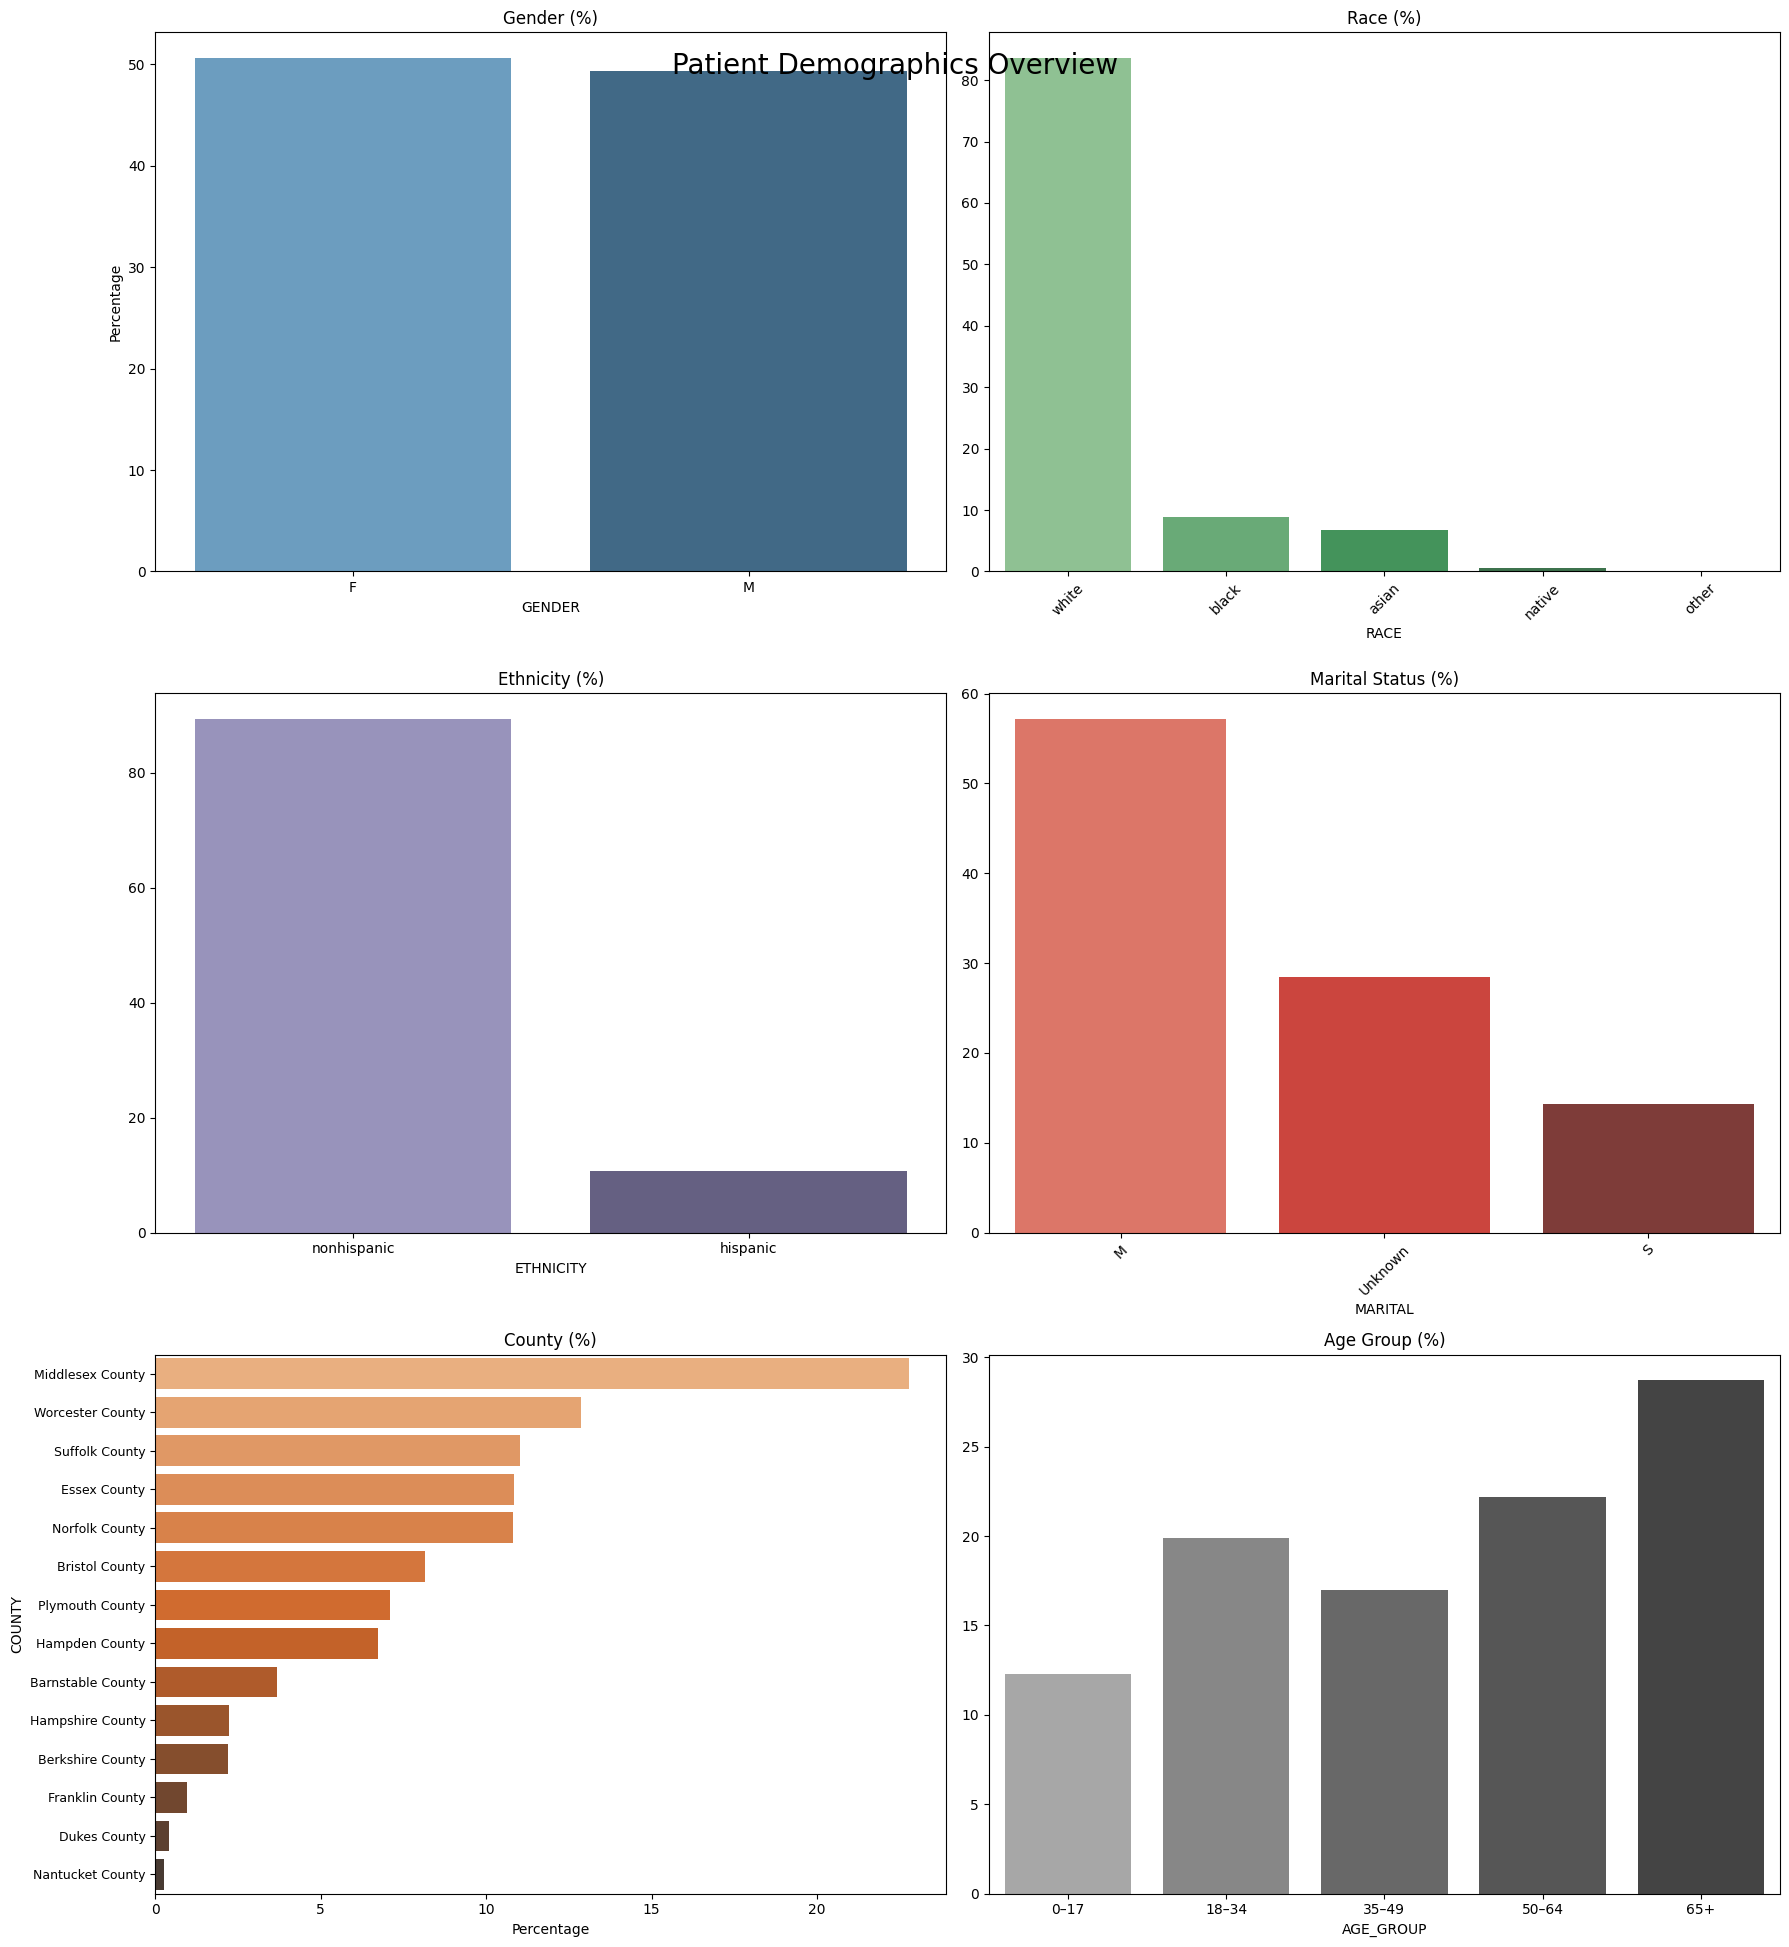

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to get % distribution
def pct(series):
    return (series.value_counts(normalize=True) * 100).round(2)

# Compute percentages
gender_pct = pct(patients2['GENDER'])
race_pct = pct(patients2['RACE'])
ethnicity_pct = pct(patients2['ETHNICITY'])
marital_pct = pct(patients2['MARITAL'])
county_pct = pct(patients2['COUNTY'])
age_group_pct = pct(patients2['AGE_GROUP'])

# Create one combined figure
fig, axes = plt.subplots(3, 2, figsize=(18, 20))
fig.suptitle("Patient Demographics Overview", fontsize=20, y=0.95)

# Gender
sns.barplot(
    x=gender_pct.index,
    y=gender_pct.values,
    ax=axes[0,0], palette="Blues_d")
axes[0,0].set_title("Gender (%)")
axes[0,0].set_ylabel("Percentage")

# Race
sns.barplot(
    x=race_pct.index,
    y=race_pct.values,
    ax=axes[0,1], palette="Greens_d")
axes[0,1].set_title("Race (%)")
axes[0,1].tick_params(axis='x', rotation=45)

# Ethnicity
sns.barplot(
    x=ethnicity_pct.index,
    y=ethnicity_pct.values,
    ax=axes[1,0], palette="Purples_d")
axes[1,0].set_title("Ethnicity (%)")

# Marital Status
sns.barplot(
    x=marital_pct.index,
    y=marital_pct.values,
    ax=axes[1,1], palette="Reds_d")
axes[1,1].set_title("Marital Status (%)")
axes[1,1].tick_params(axis='x', rotation=45)

# County
sns.barplot(
    y=county_pct.index,
    x=county_pct.values,
    ax=axes[2,0], palette="Oranges_d")
axes[2,0].set_title("County (%)")
axes[2,0].set_xlabel("Percentage")
axes[2,0].tick_params(axis='y', labelsize=9)

# Age Group
sns.barplot(
    x=age_group_pct.index,
    y=age_group_pct.values,
    ax=axes[2,1], palette="Greys_d")
axes[2,1].set_title("Age Group (%)")
axes[2,1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
age_expense_summary = patients2.groupby('AGE_GROUP', observed=True)['HEALTHCARE_EXPENSES'].agg(
    ['count', 'mean', 'median', 'min', 'max', 'sum']
).sort_index()
# Round all numeric columns to 2 decimals for readability
age_expense_summary = age_expense_summary.round(2)

# Display
print(age_expense_summary)

           count         mean       median       min          max  \
AGE_GROUP                                                           
0–17        1515   127,713.84   112,747.67    500.00   434,160.11   
18–34       2454   422,185.42   458,908.45  3,969.72   915,846.21   
35–49       2100   707,026.39   800,753.10  5,443.99 1,653,503.75   
50–64       2737 1,036,479.56 1,170,586.81  6,236.40 2,440,951.40   
65+         3546 1,302,529.09 1,460,316.87 10,634.81 3,178,011.87   

                       sum  
AGE_GROUP                   
0–17        193,486,465.44  
18–34     1,036,043,029.39  
35–49     1,484,755,419.44  
50–64     2,836,844,543.49  
65+       4,618,768,165.36  


In [19]:
age_group_avg = patients2.groupby('AGE_GROUP')['HEALTHCARE_EXPENSES'].mean()
print(age_group_avg)


AGE_GROUP
0–17      127,713.84
18–34     422,185.42
35–49     707,026.39
50–64   1,036,479.56
65+     1,302,529.09
Name: HEALTHCARE_EXPENSES, dtype: float64


C:\Users\Mahi2\AppData\Local\Temp\ipykernel_10848\3395909759.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg = patients2.groupby('AGE_GROUP')['HEALTHCARE_EXPENSES'].mean()


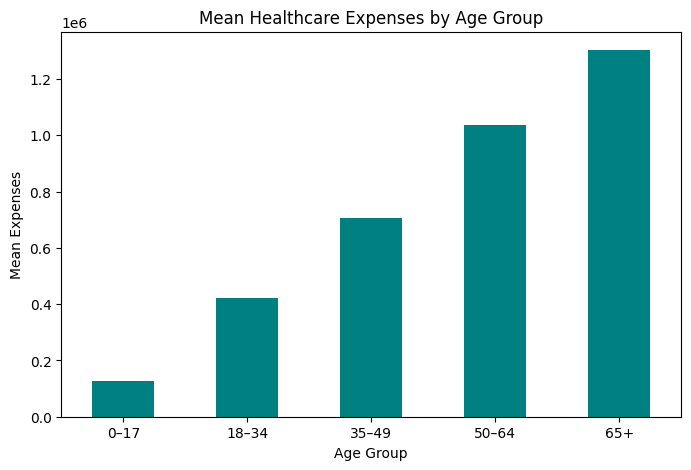

In [11]:
plt.figure(figsize=(8,5))
age_expense_summary['mean'].plot(kind='bar', color='teal')
plt.title('Mean Healthcare Expenses by Age Group')
plt.ylabel('Mean Expenses')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.show()


Ages 65+, 50-64 have the highest mean expenses. 0-17 with the lowest. older patients incure higher healthcare costs. Plan premiums based on risk by age group.
## Age-Group Healthcare Expenses Analysis

The analysis of healthcare expenses by age group shows a clear trend: **older patients incur higher healthcare costs**. Specifically, the age groups **65+** and **50–64** have the highest mean healthcare expenses, while the **0–17** age group has the lowest. This trend suggests that healthcare costs generally increase with age, likely due to higher prevalence of chronic conditions and more frequent medical interventions among older patients. 

These insights can inform decision-making for insurance and healthcare providers. For instance, **age-based risk stratification** can help in designing equitable premium structures, allocating resources efficiently, and planning preventive care programs targeted at high-risk age groups. Additionally, understanding the distribution of healthcare costs can support budgeting and policy planning for patient populations.


In [12]:
avg_expense_multi = patients2.groupby(['AGE_GROUP','GENDER','RACE'], observed=True)['HEALTHCARE_EXPENSES'].mean().reset_index()
avg_expense_multi.rename(columns={'HEALTHCARE_EXPENSES': 'AVG_EXPENSE'}, inplace=True)
print(avg_expense_multi)


   AGE_GROUP GENDER    RACE  AVG_EXPENSE
0       0–17      F   asian   109,702.76
1       0–17      F   black   121,651.21
2       0–17      F  native   135,164.81
3       0–17      F   white   128,155.10
4       0–17      M   asian   125,347.28
5       0–17      M   black   125,223.67
6       0–17      M  native   182,599.05
7       0–17      M   other   166,844.82
8       0–17      M   white   129,728.99
9      18–34      F   asian   439,585.88
10     18–34      F   black   382,662.81
11     18–34      F  native   406,973.62
12     18–34      F   other   502,113.59
13     18–34      F   white   411,103.82
14     18–34      M   asian   444,982.83
15     18–34      M   black   457,016.40
16     18–34      M  native   534,726.57
17     18–34      M   other   319,881.00
18     18–34      M   white   430,445.61
19     35–49      F   asian   634,879.24
20     35–49      F   black   723,855.85
21     35–49      F  native   559,615.55
22     35–49      F   white   692,574.65
23     35–49    

C:\Users\Mahi2\AppData\Local\Temp\ipykernel_10848\411443771.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  avg_expense_pivot = avg_expense_multi.pivot_table(


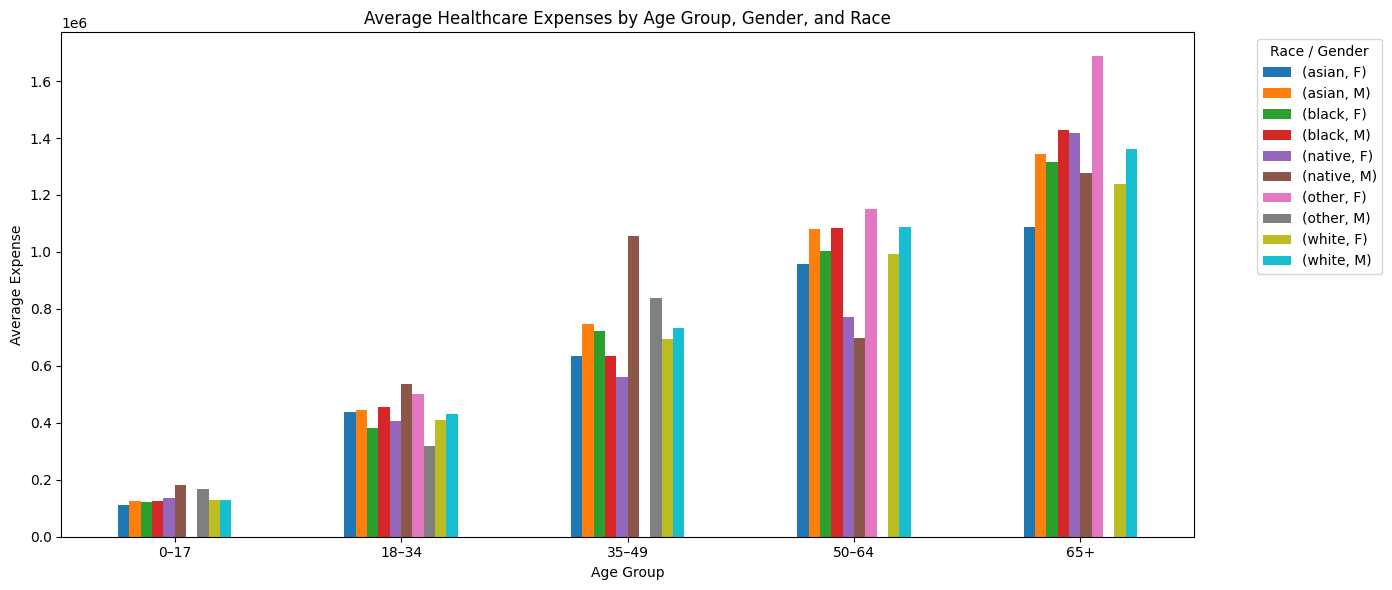

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Pivot table: rows = AGE_GROUP, columns = RACE + GENDER, values = AVG_EXPENSE
avg_expense_pivot = avg_expense_multi.pivot_table(
    index='AGE_GROUP',
    columns=['RACE', 'GENDER'],
    values='AVG_EXPENSE'
)

# Plotting
avg_expense_pivot.plot(kind='bar', figsize=(14,6))
plt.title('Average Healthcare Expenses by Age Group, Gender, and Race')
plt.ylabel('Average Expense')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.legend(title='Race / Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



C:\Users\Mahi2\AppData\Local\Temp\ipykernel_10848\4293791391.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


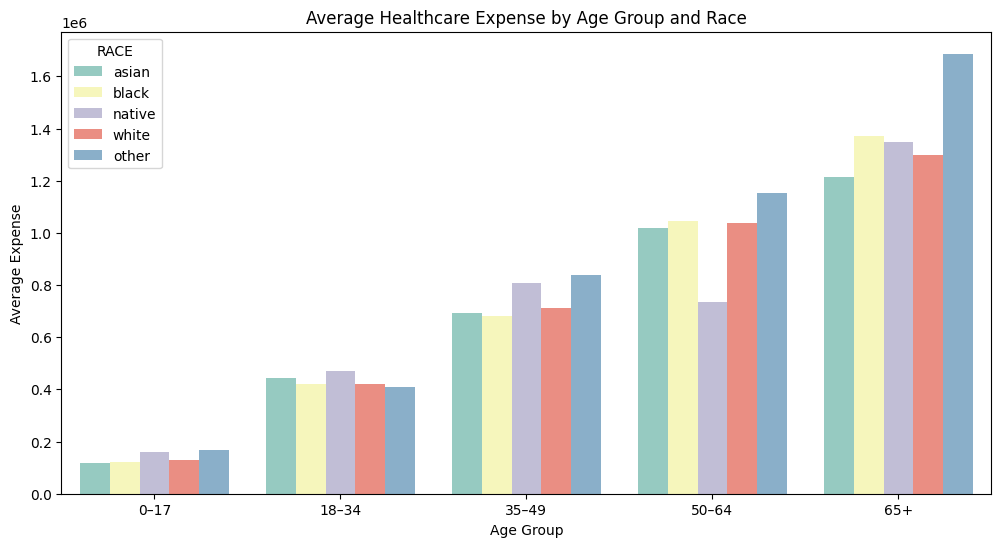

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(
    data=avg_expense_multi,
    x='AGE_GROUP',
    y='AVG_EXPENSE',
    hue='RACE',
    ci=None, palette='Set3'
)
plt.title('Average Healthcare Expense by Age Group and Race')
plt.ylabel('Average Expense')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.show()


C:\Users\Mahi2\AppData\Local\Temp\ipykernel_10848\3112811374.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


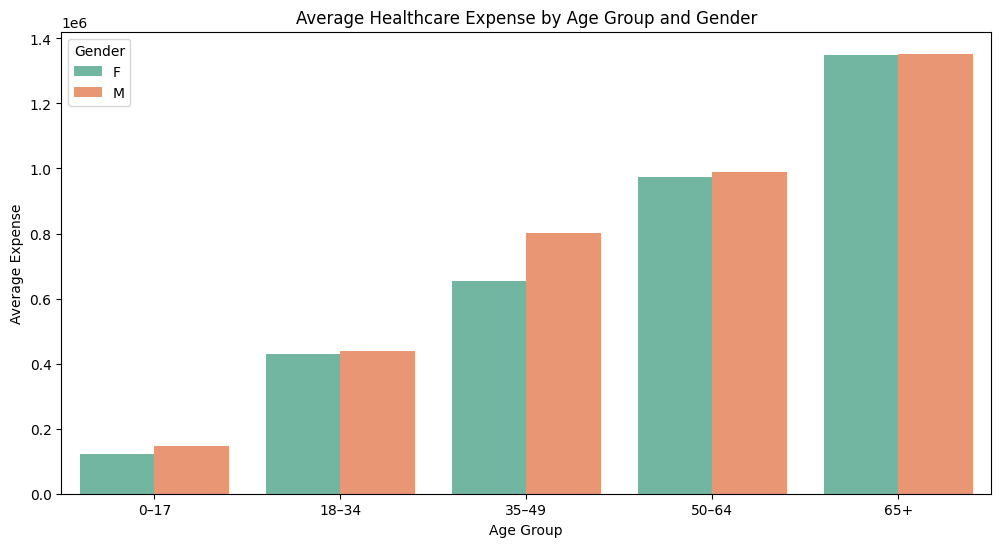

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=avg_expense_multi,
    x='AGE_GROUP',
    y='AVG_EXPENSE',
    hue='GENDER',  # Hue is now gender
    ci=None,
    palette='Set2'
)
plt.title('Average Healthcare Expense by Age Group and Gender')
plt.ylabel('Average Expense')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()


### Average Healthcare Expenses by Age, Race, and Gender

- **Age:** Expenses increase with age. The 65+ group has the highest costs, while 0–17 has the lowest.  
- **Gender:** Male and female patients show similar average expenses across all age groups.  
- **Race:** Black and Native patients tend to have slightly higher expenses, followed by White and Asian patients.  
- **Insight:** Age and race are key drivers of healthcare costs; gender differences are minimal.  


In [18]:
#patients1.describe(include='all')
#import pandas as pd

# Create a summary table
summary = pd.DataFrame({
    'Data Type': patients2.dtypes,
    'Missing Count': patients2.isnull().sum(),
    'Missing %': (patients2.isnull().mean() * 100).round(2),
    'Unique Count': patients2.nunique(),
    'Top': patients2.mode().iloc[0],
    'Top Freq': patients2.apply(lambda x: x.value_counts().iloc[0] if x.value_counts().size > 0 else 0),
    'Mean': patients2.select_dtypes(include='number').mean(),
    'Min': patients2.select_dtypes(include='number').min(),
    'Max': patients2.select_dtypes(include='number').max()
})

# Reorder numeric columns in the summary for clarity
numeric_cols = patients2.select_dtypes(include='number').columns
summary['Mean'] = summary['Mean'].reindex(summary.index)
summary['Min'] = summary['Min'].reindex(summary.index)
summary['Max'] = summary['Max'].reindex(summary.index)

# Display only columns with missing values or numeric summaries
summary_filtered = summary[
    (summary['Missing Count'] > 0) | summary['Mean'].notna()
]

# Display the table
print(summary_filtered)



                          Data Type  Missing Count  Missing %  Unique Count  \
AGE                           int64              0       0.00           117   
DEATHDATE            datetime64[ns]          10000      80.96          1928   
HEALTHCARE_COVERAGE         float64              0       0.00          9646   
HEALTHCARE_EXPENSES         float64              0       0.00         12313   
LAT                         float64              0       0.00         12352   
LON                         float64              0       0.00         12352   
ZIP                         float64           5652      45.76           290   
is_alive                      int64              0       0.00             2   

                                     Top  Top Freq       Mean      Min  \
AGE                                58.00       220      48.72     0.00   
DEATHDATE            2020-03-13 00:00:00        20        NaN      NaN   
HEALTHCARE_COVERAGE                 0.00       301  13,143.89     

C:\Users\Mahi2\AppData\Local\Temp\ipykernel_10848\889576934.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_cost = patients2.groupby('AGE_GROUP')['HEALTHCARE_EXPENSES'].mean().sort_index()


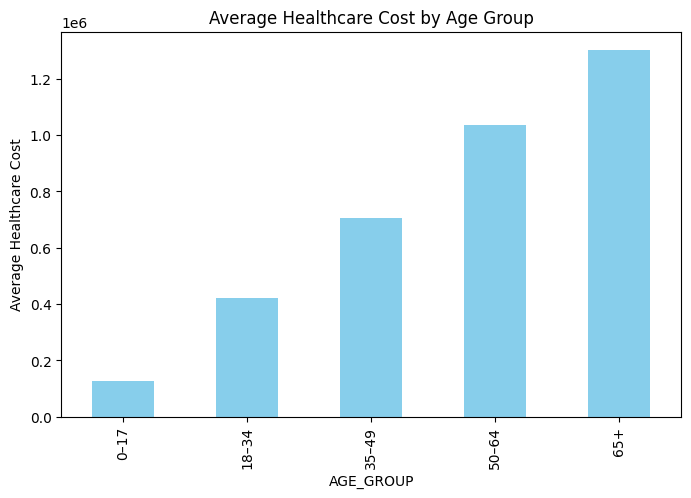

In [23]:
import matplotlib.pyplot as plt

age_group_cost = patients2.groupby('AGE_GROUP')['HEALTHCARE_EXPENSES'].mean().sort_index()

plt.figure(figsize=(8,5))
age_group_cost.plot(kind='bar', color='skyblue')
plt.ylabel('Average Healthcare Cost')
plt.title('Average Healthcare Cost by Age Group')
plt.show()


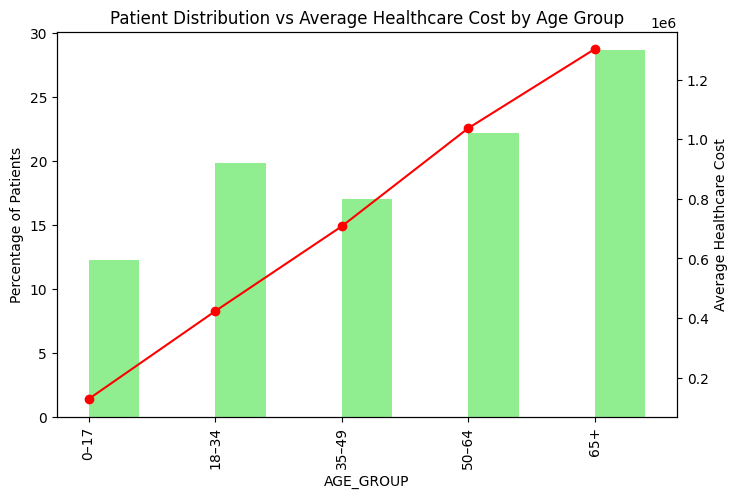

In [12]:
import seaborn as sns

age_pct = pct(patients2['AGE_GROUP'])  # your existing function
age_summary = pd.DataFrame({
    'Percentage': age_pct,
    'Avg_Cost': age_group_cost
})

fig, ax1 = plt.subplots(figsize=(8,5))

ax2 = ax1.twinx()
age_summary['Percentage'].plot(kind='bar', color='lightgreen', ax=ax1, width=0.4, position=0)
age_summary['Avg_Cost'].plot(kind='line', color='red', marker='o', ax=ax2)

ax1.set_ylabel('Percentage of Patients')
ax2.set_ylabel('Average Healthcare Cost')
plt.title('Patient Distribution vs Average Healthcare Cost by Age Group')
plt.show()


In [30]:
print(age_summary['Avg_Cost'].dtype)

float64


In [35]:
age_summary['Avg_Cost'] = pd.to_numeric(
    age_summary['Avg_Cost'].astype(str).str.replace(',', ''),
    errors='coerce'
)



In [38]:
age_summary.index = pd.Categorical(
    age_summary.index,
    categories=['0–17','18–34','35–49','50–64','65+'],
    ordered=True
)


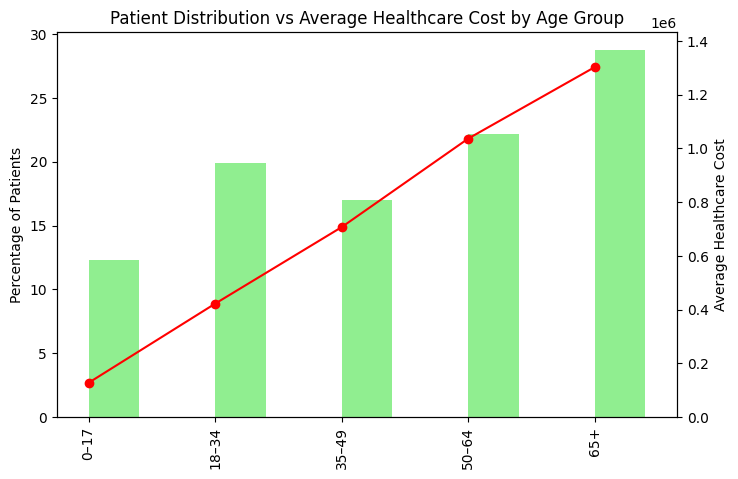

In [39]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()

# Bar chart
age_summary['Percentage'].plot(kind='bar', color='lightgreen', ax=ax1, width=0.4, position=0)

# Line chart for numeric Avg_Cost
age_summary['Avg_Cost'].plot(kind='line', color='red', marker='o', ax=ax2)

# Set labels
ax1.set_ylabel('Percentage of Patients')
ax2.set_ylabel('Average Healthcare Cost')

# Optional: set proper limits
ax2.set_ylim(0, age_summary['Avg_Cost'].max() * 1.1)

plt.title('Patient Distribution vs Average Healthcare Cost by Age Group')
plt.show()



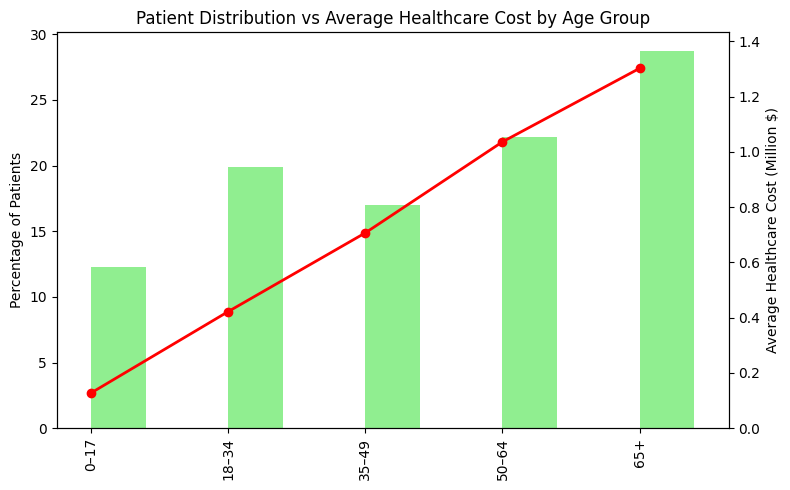

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Convert Avg_Cost to numeric, removing commas
age_summary['Avg_Cost'] = pd.to_numeric(
    age_summary['Avg_Cost'].astype(str).str.replace(',', ''),
    errors='coerce'
)

# 2. Create Avg_Cost in millions
age_summary['Avg_Cost_M'] = age_summary['Avg_Cost'] / 1_000_000

# 3. Ensure age groups are ordered
age_summary.index = pd.Categorical(
    age_summary.index,
    categories=['0–17', '18–34', '35–49', '50–64', '65+'],
    ordered=True
)

# 4. Plotting
fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()

# Bar plot for Percentage
age_summary['Percentage'].plot(
    kind='bar', color='lightgreen', ax=ax1, width=0.4, position=0
)

# Line plot for Avg_Cost in millions
age_summary['Avg_Cost_M'].plot(
    kind='line', color='red', marker='o', linewidth=2, markersize=6, ax=ax2
)

# Labels
ax1.set_ylabel('Percentage of Patients')
ax2.set_ylabel('Average Healthcare Cost (Million $)')

# Set proper limits for y-axis
ax2.set_ylim(0, age_summary['Avg_Cost_M'].max() * 1.1)

plt.title('Patient Distribution vs Average Healthcare Cost by Age Group')
plt.tight_layout()
plt.show()


In [47]:
conditions1 = pd.read_csv('C:\\Users\\Mahi2\\capstone\\capstone_healthpredictors\\data\\condis.csv')
print("\nShape (rows, columns):", conditions1.shape)
print(conditions1.columns.tolist())
conditions1['memberid'] = conditions1['PATIENT'].str[:8]
print(conditions1.head().to_string())


Shape (rows, columns): (75561, 6)
['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION']
        START       STOP                               PATIENT                             ENCOUNTER           CODE         DESCRIPTION  memberid
0   2/15/2019   8/1/2019  f0f3bc8d-ef38-49ce-a2bd-dfdda982b271  d5ee30a9-362f-429e-a87a-ee38d999b0a5  65,363,002.00        Otitis media  f0f3bc8d
1  10/30/2019  1/30/2020  f0f3bc8d-ef38-49ce-a2bd-dfdda982b271  8bca6d8a-ab80-4cbf-8abb-46654235f227  65,363,002.00        Otitis media  f0f3bc8d
2    3/1/2020  3/30/2020  f0f3bc8d-ef38-49ce-a2bd-dfdda982b271  681c380b-3c84-4c55-80a6-db3d9ea12fee 386,661,006.00     Fever (finding)  f0f3bc8d
3    3/1/2020   3/1/2020  f0f3bc8d-ef38-49ce-a2bd-dfdda982b271  681c380b-3c84-4c55-80a6-db3d9ea12fee 840,544,004.00  Suspected COVID-19  f0f3bc8d
4    3/1/2020  3/30/2020  f0f3bc8d-ef38-49ce-a2bd-dfdda982b271  681c380b-3c84-4c55-80a6-db3d9ea12fee 840,539,006.00            COVID-19  f0f3bc8d


In [48]:
cols_to_drop = ['ENCOUNTER', 'CODE','PATIENT']
conditions1.drop(columns=cols_to_drop, inplace=True)
conditions1['START'] = pd.to_datetime(conditions1['START'], errors='coerce')
conditions1['STOP'] = pd.to_datetime(conditions1['STOP'], errors='coerce')
print(conditions1.head().to_string())

       START       STOP         DESCRIPTION  memberid
0 2019-02-15 2019-08-01        Otitis media  f0f3bc8d
1 2019-10-30 2020-01-30        Otitis media  f0f3bc8d
2 2020-03-01 2020-03-30     Fever (finding)  f0f3bc8d
3 2020-03-01 2020-03-01  Suspected COVID-19  f0f3bc8d
4 2020-03-01 2020-03-30            COVID-19  f0f3bc8d


In [49]:
missing_countsc1 = conditions1.isnull().sum()
##print(missing_countsc1)
missing_percentc1 = conditions1.isnull().mean() * 100

print(missing_percentc1)
print(conditions1.dtypes)

START          0.00
STOP          45.14
DESCRIPTION    0.00
memberid       0.00
dtype: float64
START          datetime64[ns]
STOP           datetime64[ns]
DESCRIPTION            object
memberid               object
dtype: object


In [50]:
data_extraction_date = pd.to_datetime('2025-11-22')  # replace with your data extraction date
conditions1['STOP'] = conditions1['STOP'].fillna(data_extraction_date)
conditions1.rename(columns={'STOP': 'condition_stopdate'}, inplace=True)
conditions1.rename(columns={'START': 'condition_startdate'}, inplace=True)

# 3️⃣ Calculate duration
conditions1['DURATION_DAYS'] = (conditions1['condition_stopdate'] - conditions1['condition_startdate']).dt.days

In [51]:
conditions2 = conditions1.copy()

In [54]:
condition_counts = (
    conditions2
    .groupby('memberid')['DESCRIPTION']
    .nunique()        # counts unique condition descriptions
    .reset_index(name='num_conditions')
)
print(condition_counts)

      memberid  num_conditions
0     00049ee8              11
1     000769a6               4
2     0008a63c              16
3     00093cdd              22
4     000aa2a0              10
...        ...             ...
8060  ffd38ac7               7
8061  ffd3d544               5
8062  ffd86fda               9
8063  ffdbbb1b              21
8064  ffea1d41               5

[8065 rows x 2 columns]


In [ ]:
# Number of unique conditions per member
num_conditions = (
    conditions2
        .groupby('memberid')['DESCRIPTION']
        .nunique()
        .reset_index(name='num_conditions')
)




In [58]:
chronic_df = conditions1[
    conditions1['DESCRIPTION'].str.lower().isin([c.lower() for c in chronic_conditions])
]

num_chronic_conditions = (
    chronic_df
        .groupby('memberid')['DESCRIPTION']
        .nunique()
        .reset_index(name='num_chronic_conditions')
)


In [52]:
# 4️⃣ Binary flag for COVID
conditions2['COVID_flag'] = conditions2['DESCRIPTION'].str.contains('COVID', case=False, na=False).astype(int)
covid_rows = conditions2[conditions2['DESCRIPTION'].str.contains('COVID', case=False, na=False)]
#print(covid_rows)

num_covid = conditions2['DESCRIPTION'].str.contains('COVID', case=False, na=False).sum()
print(f"Number of rows with COVID: {num_covid}")



Number of rows with COVID: 11838


In [59]:
num_chronic_conditions = (
    chronic_df
        .groupby('memberid')['DESCRIPTION']
        .nunique()
        .reset_index(name='num_chronic_conditions')
)


In [60]:
patients2 = (
    patients2
        .merge(num_conditions, on='memberid', how='left')
        .merge(num_chronic_conditions, on='memberid', how='left')
)

# Fill NaN for members without any conditions
patients2[['num_conditions', 'num_chronic_conditions']] = (
    patients2[['num_conditions', 'num_chronic_conditions']].fillna(0).astype(int)
)


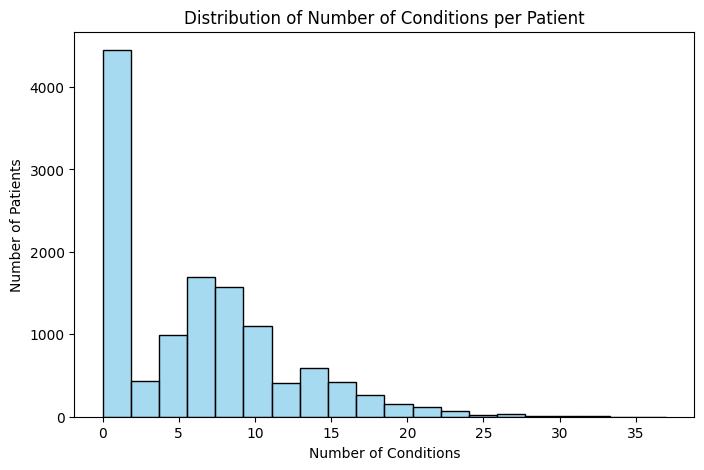

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(patients2['num_conditions'], bins=20, color='skyblue')
plt.title("Distribution of Number of Conditions per Patient")
plt.xlabel("Number of Conditions")
plt.ylabel("Number of Patients")
plt.show()


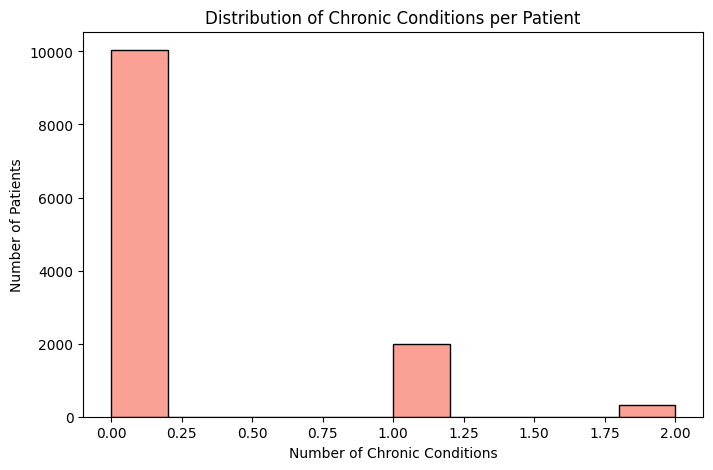

In [62]:
plt.figure(figsize=(8,5))
sns.histplot(patients2['num_chronic_conditions'], bins=10, color='salmon')
plt.title("Distribution of Chronic Conditions per Patient")
plt.xlabel("Number of Chronic Conditions")
plt.ylabel("Number of Patients")
plt.show()


C:\Users\Mahi2\AppData\Local\Temp\ipykernel_10848\467914871.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


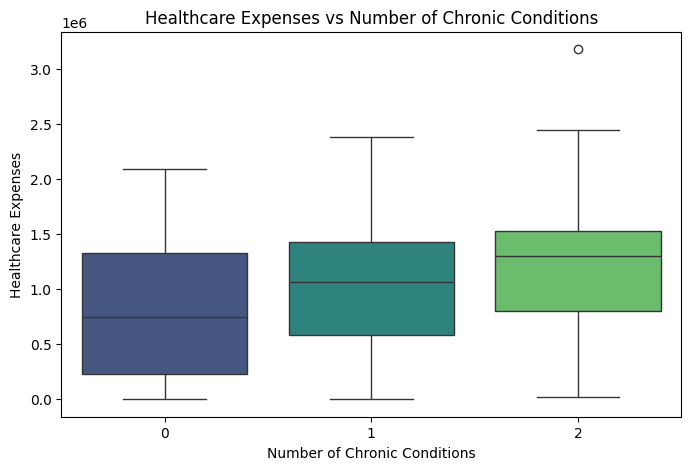

In [63]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x=patients2['num_chronic_conditions'],
    y=patients2['HEALTHCARE_EXPENSES'],
    palette='viridis'
)
plt.title("Healthcare Expenses vs Number of Chronic Conditions")
plt.xlabel("Number of Chronic Conditions")
plt.ylabel("Healthcare Expenses")
plt.show()


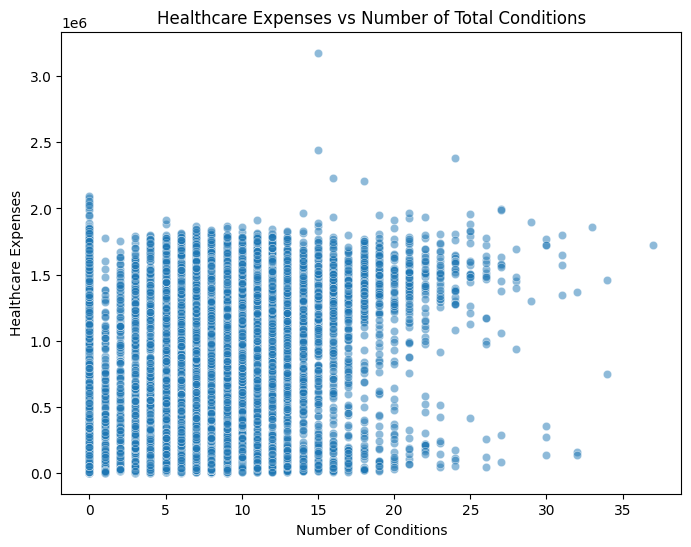

In [64]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='num_conditions',
    y='HEALTHCARE_EXPENSES',
    data=patients2,
    alpha=0.5
)
plt.title("Healthcare Expenses vs Number of Total Conditions")
plt.xlabel("Number of Conditions")
plt.ylabel("Healthcare Expenses")
plt.show()


In [53]:
# 5️⃣ Create patient-level features using groupby + agg
patient_features = conditions2.groupby('memberid').agg(
    total_conditions=('DESCRIPTION', 'count'),
    unique_conditions=('DESCRIPTION', 'nunique'),
    total_duration_days=('DURATION_DAYS', 'sum'),
    avg_duration_days=('DURATION_DAYS', 'mean'),
    max_duration_days=('DURATION_DAYS', 'max'),
    min_duration_days=('DURATION_DAYS', 'min'),
    first_diagnosis=('condition_startdate', 'min'),
    last_diagnosis=('condition_startdate', 'max'),
    COVID_flag=('COVID_flag', 'max')
).reset_index()

print(patient_features.head())

   memberid  total_conditions  unique_conditions  total_duration_days  \
0  00049ee8                11                 11                39062   
1  000769a6                 4                  4                37709   
2  0008a63c                16                 16                32798   
3  00093cdd                22                 22               134444   
4  000aa2a0                14                 10                11584   

   avg_duration_days  max_duration_days  min_duration_days first_diagnosis  \
0           3,551.09              13145                  0      1989-11-26   
1           9,427.25              13034               2053      1990-03-17   
2           2,049.88               2967                  0      2017-10-08   
3           6,111.09              25595                  0      1955-10-26   
4             827.43               4637                  0      1981-11-20   

  last_diagnosis  COVID_flag  
0     2020-03-08           1  
1     2020-04-09           0  

In [57]:
chronic_conditions = ['diabetes', 'hypertension', 'heart disease', 'COPD', 'asthma', 'cancer']
# Filter only rows with chronic conditions
chronic_df = conditions1[conditions1['DESCRIPTION'].str.lower().isin([c.lower() for c in chronic_conditions])]
# Create one-hot encoding per patient
chronic_flags = pd.crosstab(chronic_df['memberid'], chronic_df['DESCRIPTION'].str.lower())
chronic_flags = (chronic_flags > 0).astype(int).reset_index()  # Convert counts to 0/1 flags


# Rename columns to match flag style
chronic_flags.rename(columns=lambda x: f"{x}_flag" if x != 'memberid' else x, inplace=True)

# 7️⃣ Merge chronic flags with main patient_features
patient_features = patient_features.merge(chronic_flags, on='memberid', how='left').fillna(0)

# 8️⃣ Time since first diagnosis

# Define today's date (or the reference date for your dataset)
today = pd.to_datetime('2025-11-22')  # You can change this to the actual date of your data

patient_features['days_since_first_diagnosis'] = (today - patient_features['first_diagnosis']).dt.days

# 9️⃣ Round durations
patient_features[['avg_duration_days', 'total_duration_days']] = patient_features[['avg_duration_days', 'total_duration_days']].round(2)

# 10️⃣ Inspect
print(patient_features.head())

   memberid  total_conditions  unique_conditions  total_duration_days  \
0  00049ee8                11                 11                39062   
1  000769a6                 4                  4                37709   
2  0008a63c                16                 16                32798   
3  00093cdd                22                 22               134444   
4  000aa2a0                14                 10                11584   

   avg_duration_days  max_duration_days  min_duration_days first_diagnosis  \
0           3,551.09              13145                  0      1989-11-26   
1           9,427.25              13034               2053      1990-03-17   
2           2,049.88               2967                  0      2017-10-08   
3           6,111.09              25595                  0      1955-10-26   
4             827.43               4637                  0      1981-11-20   

  last_diagnosis  COVID_flag  asthma_flag_x  diabetes_flag_x  \
0     2020-03-08           1

In [ ]:
immunizations = pd.read_csv('C:\\Users\\Mahi2\\capstone\\capstone_healthpredictors\\data\\immunizations.csv')

NameError: name 'plt' is not defined

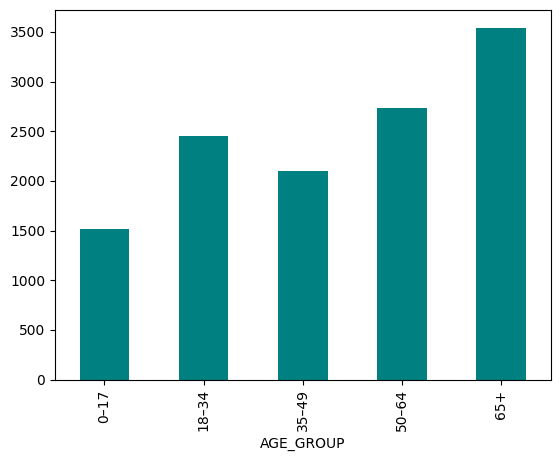

In [7]:
bins = [0, 18, 35, 50, 65, 120]
labels = ['0–17', '18–34', '35–49', '50–64', '65+']

patients2['AGE_GROUP'] = pd.cut(patients2['AGE'], bins=bins, labels=labels, right=False)

patients2['AGE_GROUP'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()


In [61]:
bins = [0, 18, 35, 50, 65, 120]
labels = ['0–17', '18–34', '35–49', '50–64', '65+']

patients2['AGE_GROUP'] = pd.cut(patients2['AGE'], bins=bins, labels=labels, right=False)

patients2['AGE_GROUP'].value_counts().sort_index()


AGE_GROUP
0–17     1517
18–34    2453
35–49    2101
50–64    2737
65+      3544
Name: count, dtype: int64

In [40]:
#print(patients2.head().to_string())
print(patients2.columns.tolist())

['Id', 'BIRTHDATE', 'DEATHDATE', 'FIRST', 'LAST', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTY', 'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE', 'memberid', 'is_alive', 'AGE']


In [ ]:
# Show counts of each value, including missing values
print(patients1['MARITAL'].value_counts(dropna=False))

MARITAL
M      7060
NaN    3519
S      1773
Name: count, dtype: int64


In [5]:
print(patients1.columns.tolist())
print(patients1.info())

['Id', 'BIRTHDATE', 'DEATHDATE', 'FIRST', 'LAST', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTY', 'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE', 'memberid']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12352 entries, 0 to 12351
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   12352 non-null  object 
 1   BIRTHDATE            12352 non-null  object 
 2   DEATHDATE            2352 non-null   object 
 3   FIRST                12352 non-null  object 
 4   LAST                 12352 non-null  object 
 5   MARITAL              8833 non-null   object 
 6   RACE                 12352 non-null  object 
 7   ETHNICITY            12352 non-null  object 
 8   GENDER               12352 non-null  object 
 9   BIRTHPLACE           12352 non-null  object 
 10  ADDRESS              12352 non-null  object 
 11  CITY         

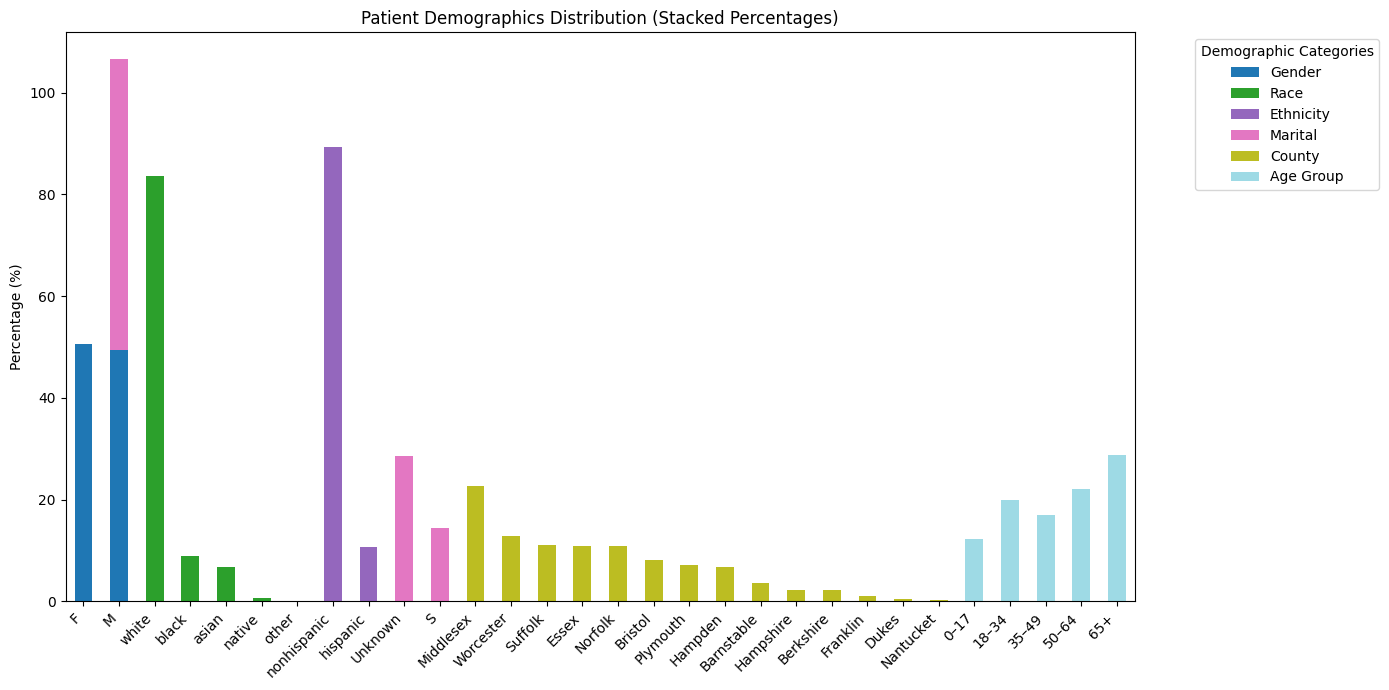

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ----- Data -----
demographics = {
    'Gender': {'F': 6253, 'M': 6099},
    'Race': {'white': 10328, 'black': 1100, 'asian': 842, 'native': 73, 'other': 9},
    'Ethnicity': {'nonhispanic': 11036, 'hispanic': 1316},
    'Marital': {'M': 7060, 'Unknown': 3519, 'S': 1773},
    'County': {
        'Middlesex': 2812, 'Worcester': 1589, 'Suffolk': 1361, 'Essex': 1340,
        'Norfolk': 1336, 'Bristol': 1005, 'Plymouth': 874, 'Hampden': 833,
        'Barnstable': 456, 'Hampshire': 274, 'Berkshire': 270, 'Franklin': 119,
        'Dukes': 52, 'Nantucket': 31
    },
    'Age Group': {'0–17': 1517, '18–34': 2453, '35–49': 2101, '50–64': 2737, '65+': 3544}
}

# ----- Convert to DataFrame with percentages -----
df_list = []
for demo, counts in demographics.items():
    s = pd.Series(counts)
    s = s / s.sum() * 100  # convert to percentage
    df_list.append(s.rename(demo))

demo_df = pd.DataFrame(df_list).T.fillna(0)

# ----- Plot -----
demo_df.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.ylabel('Percentage (%)')
plt.title('Patient Demographics Distribution (Stacked Percentages)')
plt.legend(title='Demographic Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\Mahi2\AppData\Local\Temp\ipykernel_16956\889576934.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_cost = patients2.groupby('AGE_GROUP')['HEALTHCARE_EXPENSES'].mean().sort_index()


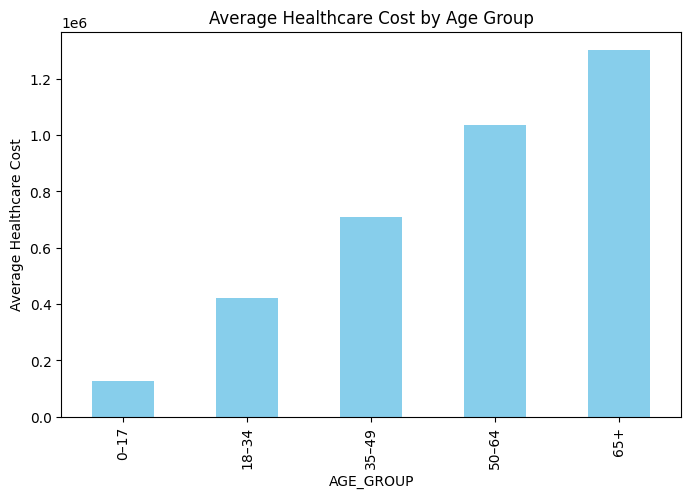

C:\Users\Mahi2\AppData\Local\Temp\ipykernel_11172\889576934.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_cost = patients2.groupby('AGE_GROUP')['HEALTHCARE_EXPENSES'].mean().sort_index()


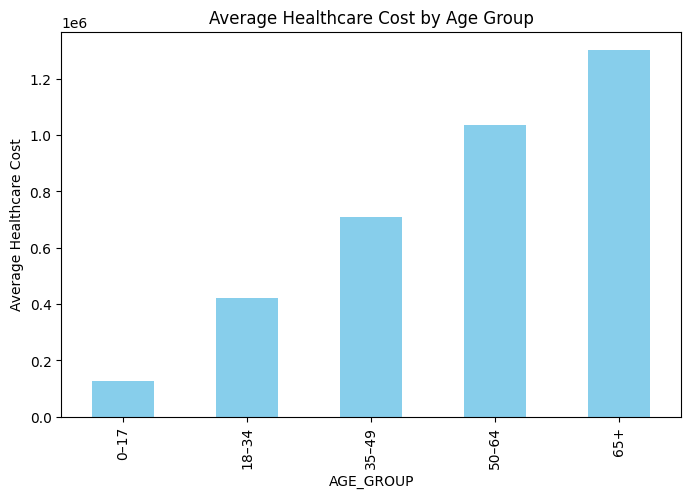

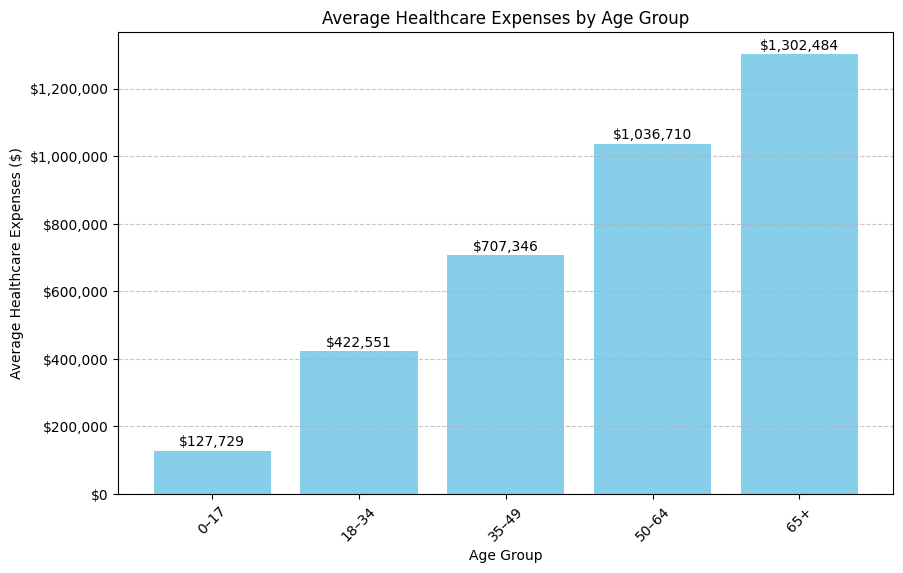

In [73]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Group by age group and compute mean healthcare expenses
age_group_cost = patients2.groupby('AGE_GROUP', observed=True)['HEALTHCARE_EXPENSES'].mean().sort_index()

# Function to format y-axis as dollars
def dollars(x, pos):
    return f'${x:,.0f}'

formatter = FuncFormatter(dollars)

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(age_group_cost.index, age_group_cost.values, color='skyblue')

plt.gca().yaxis.set_major_formatter(formatter)
plt.title('Average Healthcare Expenses by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Healthcare Expenses ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5000, f"${yval:,.0f}", ha='center', va='bottom')

plt.show()


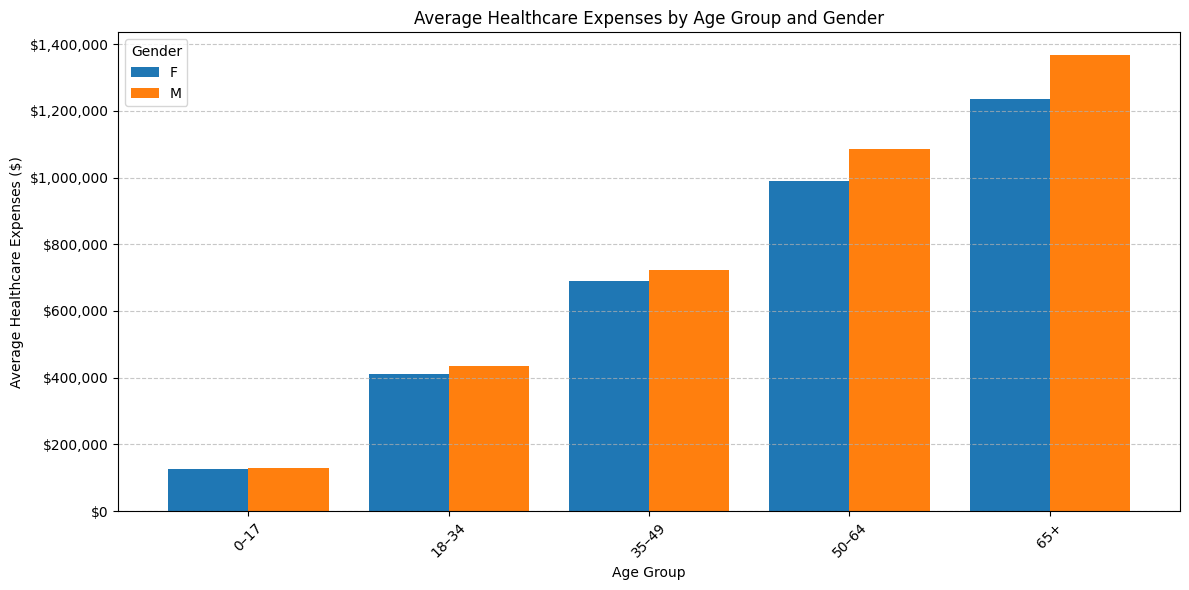

: 

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Group by AGE_GROUP and GENDER, compute mean healthcare expenses
age_gender_cost = patients2.groupby(['AGE_GROUP', 'GENDER'], observed=True)['HEALTHCARE_EXPENSES'].mean().unstack()

# Function to format y-axis in dollars
def dollars(x, pos):
    return f'${x:,.0f}'

formatter = FuncFormatter(dollars)

# Plot
age_gender_cost.plot(kind='bar', figsize=(12,6), width=0.8)

plt.gca().yaxis.set_major_formatter(formatter)
plt.title('Average Healthcare Expenses by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Healthcare Expenses ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Gender')

plt.tight_layout()
plt.show()


In [10]:
print(patients1.isnull().sum())

Id                         0
BIRTHDATE                  0
DEATHDATE              10000
SSN                        0
DRIVERS                 1953
PASSPORT                2507
PREFIX                  2242
FIRST                      0
LAST                       0
SUFFIX                 12228
MAIDEN                  8812
MARITAL                 3519
RACE                       0
ETHNICITY                  0
GENDER                     0
BIRTHPLACE                 0
ADDRESS                    0
CITY                       0
STATE                      0
COUNTY                     0
ZIP                     5652
LAT                        0
LON                        0
HEALTHCARE_EXPENSES        0
HEALTHCARE_COVERAGE        0
dtype: int64


In [15]:
patients1['memberid'] = patients1['Id'].str[:8]
# Check the result
print(patients1.head().to_string())

unique_memberids = patients1['memberid'].nunique()
print(unique_memberids)

                                     Id   BIRTHDATE DEATHDATE          SSN    DRIVERS    PASSPORT PREFIX        FIRST        LAST SUFFIX MAIDEN MARITAL   RACE    ETHNICITY GENDER                      BIRTHPLACE                         ADDRESS         CITY          STATE           COUNTY     ZIP   LAT    LON  HEALTHCARE_EXPENSES  HEALTHCARE_COVERAGE  memberid
0  f0f3bc8d-ef38-49ce-a2bd-dfdda982b271  2017-08-24       NaN  999-68-6630        NaN         NaN    NaN   Jacinto644     Kris249    NaN    NaN     NaN  white  nonhispanic      M      Beverly  Massachusetts  US       888 Hickle Ferry Suite 38  Springfield  Massachusetts   Hampden County 1106.00 42.15 -72.60              8446.49              1499.08  f0f3bc8d
1  067318a4-db8f-447f-8b6e-f2f61e9baaa5  2016-08-01       NaN  999-15-5895        NaN         NaN    NaN      Alva958  Krajcik437    NaN    NaN     NaN  white  nonhispanic      F       Boston  Massachusetts  US             1048 Skiles Trailer      Walpole  Massachusetts   Norfo

In [12]:
patients1['COUNTY'].unique()

array(['Hampden County', 'Norfolk County', 'Plymouth County',
       'Suffolk County', 'Franklin County', 'Middlesex County',
       'Bristol County', 'Essex County', 'Worcester County',
       'Hampshire County', 'Barnstable County', 'Berkshire County',
       'Dukes County', 'Nantucket County'], dtype=object)

In [13]:
patients1[['HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE']].describe()

,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
count,12352.00,12352.00
mean,823340.16,13143.89
std,560901.64,43923.34
min,500.00,0.00
25%,271270.82,3228.08
50%,822483.43,6138.94
75%,1359019.21,11442.49
max,3178011.87,2199825.08


In [ ]:
import pandas as pd
procedures1 = pd.read_csv('C:\\Users\\Mahi2\\capstone\\capstone_healthpredictors\\data\\procedures.csv')
# View a few rows (table)
print(procedures1.head().to_string())

         DATE                               PATIENT                             ENCOUNTER       CODE                            DESCRIPTION  BASE_COST   REASONCODE                     REASONDESCRIPTION
0  2019-08-01  f0f3bc8d-ef38-49ce-a2bd-dfdda982b271  6a74fdef-2287-44bf-b9e7-18012376faca  430193006  Medication Reconciliation (procedure)     495.80          NaN                                   NaN
1  2020-03-01  f0f3bc8d-ef38-49ce-a2bd-dfdda982b271  681c380b-3c84-4c55-80a6-db3d9ea12fee  261352009            Face mask (physical object)     516.65 840544004.00                    Suspected COVID-19
2  2020-01-06  067318a4-db8f-447f-8b6e-f2f61e9baaa5  df2e9ebd-090c-4fb4-b749-ec6e4cf3e75e  430193006  Medication Reconciliation (procedure)     453.37          NaN                                   NaN
3  2020-03-13  067318a4-db8f-447f-8b6e-f2f61e9baaa5  1ea74a77-3ad3-4948-a9cc-3084462035d6  261352009            Face mask (physical object)     516.65 840544004.00                    Suspected

: 

In [ ]:
procedures1['memberid'] = procedures1['Id'].str[:8]
# Check the result
print(procedures1.head().to_string())

unique_memberids = procedures1['memberid'].nunique()
print(unique_memberids)

In [17]:
# Suppose you already loaded patient and provider tables
patients = pd.read_sql_query("SELECT * FROM patient", conn)
providers = pd.read_sql_query("SELECT * FROM provider", conn)


NameError: name 'conn' is not defined